In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.patches as mpatches

In [3]:
import random

In [4]:
plt.rcParams.update({'font.size': 16})

In [5]:
results_plots_folder_name = 'new_phantom_rick_paper_6'

In [6]:
df = pd.read_csv(f'a_results_for_paper/{results_plots_folder_name}/all_contrasts2.csv')

In [7]:
df.head()

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.2,3.775764,18.632513
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.2,3.907964,81.077449
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.2,3.961420,69.181006
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.2,3.931541,66.310231
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.2,3.906253,44.319464


In [8]:
df.shape

(180, 9)

In [9]:
df

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.2,3.775764,18.632513
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.2,3.907964,81.077449
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.2,3.961420,69.181006
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.2,3.931541,66.310231
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.2,3.906253,44.319464
...,...,...,...,...,...,...,...,...,...
175,44.0,4.0,1.300139,6.396515,NaN,NaN,NaN,NaN,6.396515
176,45.0,1.0,2.873032,19.671067,NaN,NaN,NaN,NaN,19.671067
177,45.0,2.0,1.491235,16.731120,NaN,NaN,NaN,NaN,16.731120
178,45.0,3.0,1.431818,8.482150,NaN,NaN,NaN,NaN,8.482150


In [10]:
df_rank = df.dropna(subset=["type"])

In [11]:
df_rank.shape

(160, 9)

In [12]:
df_rank

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.20,3.775764,18.632513
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.20,3.907964,81.077449
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.20,3.961420,69.181006
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.20,3.931541,66.310231
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.20,3.906253,44.319464
...,...,...,...,...,...,...,...,...,...
155,39.0,4.0,1.431883,13.424638,"('1small', 'soft')",0.16 to 0.58,0.32,0.698381,13.424638
156,40.0,1.0,3.582558,11.352206,"('1small', 'soft')",0.16 to 0.58,0.32,0.279130,11.352206
157,40.0,2.0,2.420032,63.743249,"('1small', 'soft')",0.16 to 0.58,0.32,0.413218,63.743249
158,40.0,3.0,2.123361,20.106732,"('1small', 'soft')",0.16 to 0.58,0.32,0.470951,20.106732


In [13]:
df_rank['ROI_rank'] = df_rank.groupby('file_name')['cnr2'].rank(ascending=False)

/tmp/ipykernel_55049/650196569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank['ROI_rank'] = df_rank.groupby('file_name')['cnr2'].rank(ascending=False)


In [14]:
df_rank

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.20,3.775764,18.632513,4.0
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.20,3.907964,81.077449,1.0
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.20,3.961420,69.181006,2.0
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.20,3.931541,66.310231,3.0
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.20,3.906253,44.319464,4.0
...,...,...,...,...,...,...,...,...,...,...
155,39.0,4.0,1.431883,13.424638,"('1small', 'soft')",0.16 to 0.58,0.32,0.698381,13.424638,2.0
156,40.0,1.0,3.582558,11.352206,"('1small', 'soft')",0.16 to 0.58,0.32,0.279130,11.352206,4.0
157,40.0,2.0,2.420032,63.743249,"('1small', 'soft')",0.16 to 0.58,0.32,0.413218,63.743249,1.0
158,40.0,3.0,2.123361,20.106732,"('1small', 'soft')",0.16 to 0.58,0.32,0.470951,20.106732,2.0


Text(0, 0.5, 'Avg rank')

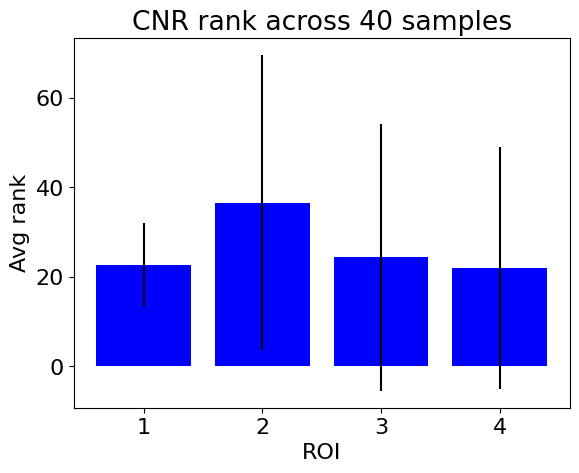

In [15]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['cnr2'].mean() for i in range(1,5)]
values_std = [df_rank[df_rank['ROI'] == i]['cnr2'].std() for i in range(1,5)]
plt.bar(categories, values, yerr=values_std, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Avg rank')

Text(0, 0.5, 'Avg rank')

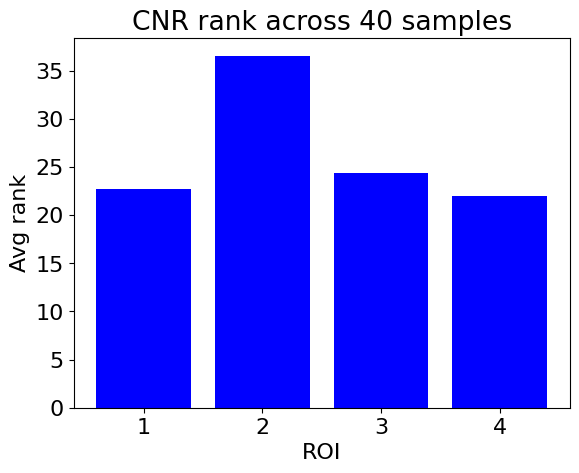

In [16]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['cnr2'].mean() for i in range(1,5)]
# values_std = [df_rank[df_rank['ROI'] == i]['cnr2'].std() for i in range(1,5)]
plt.bar(categories, values, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Avg rank')

/tmp/ipykernel_55049/2522264309.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10',10)


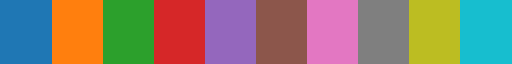

In [17]:
cmap = plt.cm.get_cmap('tab10',10)
cmap

In [18]:
colors = plt.cm.tab10(np.linspace(0, 1, 10))
colors = colors[0:4]
colors.shape

(4, 4)

In [19]:
color_values = ['red']*20 + ['yellow']*20

In [20]:
hardness = []

In [21]:
# colors_hardness = plt.cm.viridis(np.linspace(0, 1, 4))
# colors_hardness = colors_hardness[::-1]
colors_hardness = plt.cm.tab10(np.linspace(0, 1, 10))
colors_hardness = colors_hardness[0:4]
colors_hardness

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ]])

In [22]:
label = ['Very soft', 'Soft', 'Hard', 'Very hard'][::-1]
label

['Very hard', 'Hard', 'Soft', 'Very soft']

In [23]:
bar_patches=[mpatches.Patch(color=colors_hardness[i], label=label[i]) for i in range(0,4)]

In [24]:
colors_hardness = np.repeat(colors, 5, axis=0)
colors_hardness = np.concatenate((colors_hardness, colors_hardness), axis=0)
colors_hardness.shape

(40, 4)

In [25]:
# colors.shape

In [26]:
marker_types = ["s"]*20+["o"]*20

In [27]:
# marker_types

In [28]:
import matplotlib.markers as mmark
from matplotlib.legend_handler import HandlerBase

In [29]:
list_mak = [mmark.MarkerStyle('s'),mmark.MarkerStyle('o')]
list_lab = ['Large','Small']

In [30]:
# bar_patches_shape 

In [31]:
list_color  = ["blue", "crimson"]
list_mak    = ["s","o"]
list_lab    = ['Large','Small']

class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup,xdescent, ydescent,
                        width, height, fontsize,trans):
        return [plt.Line2D([width/2], [height/2.],ls="",
                       marker=tup[1],color=tup[0],markerfacecolor='None', markeredgecolor='black', transform=trans)]


In [32]:
categories = [1,2,3,4]
# values = [df_rank[df_rank['ROI'] == i]['cnr2'].mean() for i in range(1,5)]

In [33]:
values = [np.sqrt(df_rank[df_rank['ROI'] == i]['cnr2']).mean() for i in range(1,5)]

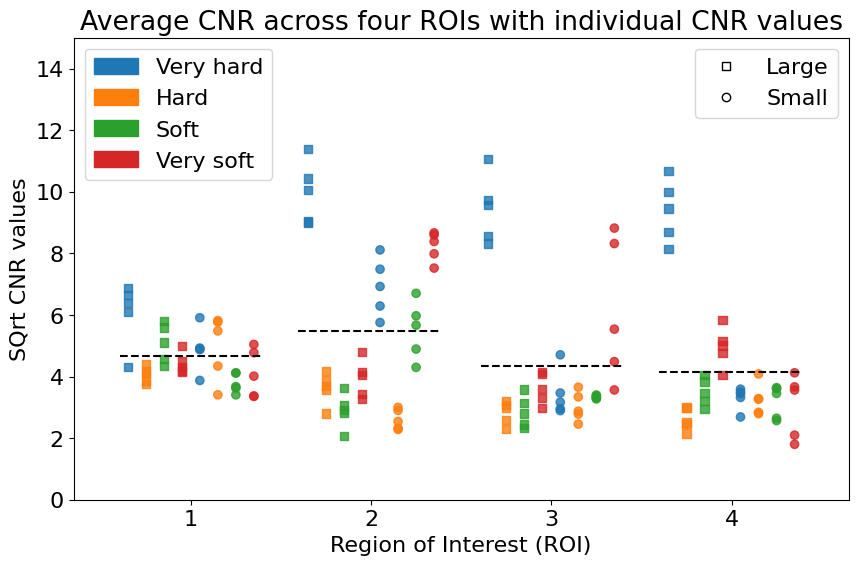

In [34]:
# Group by 'ROI' and calculate mean of 'CNR'
grouped_data = df_rank.groupby('ROI')['cnr2'].mean()

# Create the bar plot for the averages
ax = grouped_data.plot(kind='bar', color='white', figsize=(10, 6), width=0.8)
# fig, ax = plt.subplots()

# Add individual CNR values as dots
for i, roi in enumerate(grouped_data.index):
    # Filter the DataFrame for the current ROI and get the 'cnr' values
    cnr_values = df_rank[df_rank['ROI'] == roi]['cnr2']
    # print(cnr_values)
    # Overlay these as dots on the bar plot
    # varied_list = [i + random.uniform(-0.2, 0.2) for _ in range(len(cnr_values))]
    # ax.scatter(varied_list, cnr_values, color='red', alpha=0.7)
    # ax.scatter([i] * len(cnr_values), cnr_values, color='red', alpha=0.7)
    k = -0.35
    c = 0
    for j in range(0, len(cnr_values), 5):
    # Select 5 elements starting from index i
        chunk = cnr_values[j:j+5]
        varied_list = [i + k for _ in range(len(chunk))]
        if c<4:
            marker_type = 's'
            label_type = 'Large' 
        else:
            marker_type = 'o'
            label_type = 'Small' 
        # ax.scatter(varied_list, chunk, color=colors_hardness[j:j+5], alpha=0.8, marker=marker_type, linestyle='None', label=label_type)
        ax.scatter(varied_list, np.sqrt(chunk), color=colors_hardness[j:j+5], alpha=0.8, marker=marker_type, linestyle='None', label=label_type)
        # print(varied_list)
        # print(chunk)
        # ax.errorbar(varied_list[0], chunk.mean(), chunk.std(), color=colors_hardness[j:j+5][0], alpha=0.8, marker=marker_type, linestyle='None', label=label_type)
        # print(len(varied_list))
        # print(len(chunk))
        k = k+0.1
        c=c+1
        # print(c)

# ax.axhline(y=values[0], xmin=.06, xmax=.2425, color='black', linestyle='--')
# ax.axhline(y=values[1], xmin=.06+0.23, xmax=.2425+0.23, color='black', linestyle='--')
# ax.axhline(y=values[2], xmin=.06+0.23+0.235, xmax=.2425+0.23+0.235, color='black', linestyle='--')
# ax.axhline(y=values[3], xmin=.06+0.23+0.235+0.23, xmax=.2425+0.23+0.235+0.23, color='black', linestyle='--')

ax.axhline(y=values[0], xmin=.06, xmax=.2425, color='black', linestyle='--')
ax.axhline(y=values[1], xmin=.06+0.23, xmax=.2425+0.23, color='black', linestyle='--')
ax.axhline(y=values[2], xmin=.06+0.23+0.235, xmax=.2425+0.23+0.235, color='black', linestyle='--')
ax.axhline(y=values[3], xmin=.06+0.23+0.235+0.23, xmax=.2425+0.23+0.235+0.23, color='black', linestyle='--')

# Setting labels and title
plt.title('Average CNR across four ROIs with individual CNR values')
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('SQrt CNR values')
ax.set_xticklabels(categories, rotation=0)
# plt.legend(handles=bar_patches,loc='upper left')
# Creating the first legend and placing it on the left
first_legend = ax.legend(handles=bar_patches, loc='upper left')
ax.add_artist(first_legend)
# Display the plot
plt.legend(list(zip(list_color,list_mak)), list_lab, handler_map={tuple:MarkerHandler()}) 
# plt.show()
plt.ylim([0, 15])
plt.savefig('a_results_for_paper2/phantom_plot.png', bbox_inches='tight', dpi=300)
plt.show()

In [35]:
chunk

143    16.987384
147     4.396259
151     3.239993
155    13.424638
159    12.684538
Name: cnr2, dtype: float64

In [40]:
chunk.mean()

37.66500050374465

In [41]:
chunk.std()

11.286167838196551

In [49]:
np.log(chunk)

143    2.832471
147    1.480754
151    1.175571
155    2.597092
159    2.540384
Name: cnr2, dtype: float64

In [35]:
 df_rank[df_rank['ROI'] == 2.0]

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.20,3.907964,81.077449,1.0
5,2.0,2.0,3.876447,129.503222,"('4large', 'hard')",2.19 to 4.84,3.20,3.876447,129.503222,1.0
9,3.0,2.0,3.880726,81.530521,"('4large', 'hard')",2.19 to 4.84,3.20,3.880726,81.530521,1.0
13,4.0,2.0,3.794400,101.167309,"('4large', 'hard')",2.19 to 4.84,3.20,3.794400,101.167309,1.0
17,5.0,2.0,3.855734,108.688508,"('4large', 'hard')",2.19 to 4.84,3.20,3.855734,108.688508,1.0
21,6.0,2.0,1.607242,7.831882,"('3large', 'hard')",1.19 to 2.79,1.80,1.607242,7.831882,4.0
25,7.0,2.0,1.626356,13.600652,"('3large', 'hard')",1.19 to 2.79,1.80,1.626356,13.600652,2.0
29,8.0,2.0,1.596607,12.821025,"('3large', 'hard')",1.19 to 2.79,1.80,1.596607,12.821025,2.0
33,9.0,2.0,1.592839,14.996074,"('3large', 'hard')",1.19 to 2.79,1.80,1.592839,14.996074,1.0
37,10.0,2.0,1.638283,17.502740,"('3large', 'hard')",1.19 to 2.79,1.80,1.638283,17.502740,1.0


In [36]:
df_rank

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.20,3.775764,18.632513,4.0
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.20,3.907964,81.077449,1.0
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.20,3.961420,69.181006,2.0
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.20,3.931541,66.310231,3.0
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.20,3.906253,44.319464,4.0
...,...,...,...,...,...,...,...,...,...,...
155,39.0,4.0,1.431883,13.424638,"('1small', 'soft')",0.16 to 0.58,0.32,0.698381,13.424638,2.0
156,40.0,1.0,3.582558,11.352206,"('1small', 'soft')",0.16 to 0.58,0.32,0.279130,11.352206,4.0
157,40.0,2.0,2.420032,63.743249,"('1small', 'soft')",0.16 to 0.58,0.32,0.413218,63.743249,1.0
158,40.0,3.0,2.123361,20.106732,"('1small', 'soft')",0.16 to 0.58,0.32,0.470951,20.106732,2.0


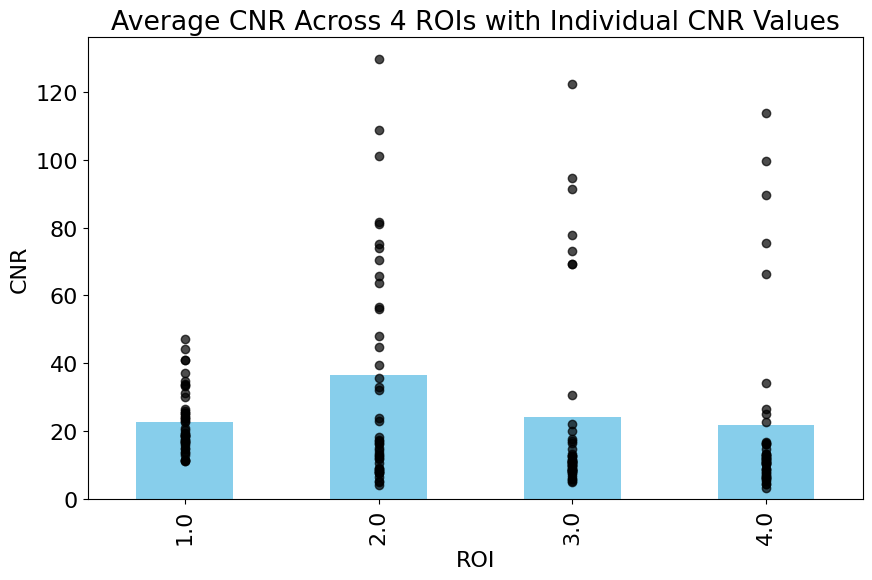

In [37]:
ax = grouped_data.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add individual CNR values as dots
for i, roi in enumerate(grouped_data.index):
    # Filter the DataFrame for the current ROI and get the 'cnr' values
    cnr_values = df[df['ROI'] == roi]['cnr']

    # Overlay these as dots on the bar plot
    ax.scatter([i] * len(cnr_values), cnr_values, color='black', alpha=0.7)

# Setting labels and title
plt.title('Average CNR Across 4 ROIs with Individual CNR Values')
plt.xlabel('ROI')
plt.ylabel('CNR')

# Display the plot
plt.show()

In [38]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Example data
# data = {
#     'file_name': ['file1', 'file2', 'file3', 'file4', 'file5', 'file6', 'file7', 'file8', 'file9', 'file10',
#                   'file11', 'file12', 'file13', 'file14', 'file15', 'file16', 'file17', 'file18', 'file19', 'file20'],
#     'ROI': ['ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI2', 'ROI2', 'ROI2', 'ROI2', 'ROI2', 
#             'ROI3', 'ROI3', 'ROI3', 'ROI3', 'ROI3', 'ROI4', 'ROI4', 'ROI4', 'ROI4', 'ROI4'],
#     'cnr': [1.2, 1.5, 1.3, 1.4, 1.6, 2.1, 2.2, 2.3, 2.0, 2.4, 
#             3.1, 3.5, 3.2, 3.0, 3.3, 4.2, 4.1, 4.3, 4.5, 4.0]
# }

# # Creating the DataFrame
# dfa = pd.DataFrame(data)

# # Group by 'ROI' and calculate mean of 'CNR'
# grouped_data = dfa.groupby('ROI')['cnr'].mean()

# # Create the bar plot for the averages
# ax = grouped_data.plot(kind='bar', color='skyblue', figsize=(10, 6))

# # Add individual CNR values as dots
# for i, roi in enumerate(grouped_data.index):
#     # Filter the DataFrame for the current ROI and get the 'cnr' values
    
#     cnr_values = dfa[dfa['ROI'] == roi]['cnr']
#     print(cnr_values)
#     # Overlay these as dots on the bar plot
#     ax.scatter([i] * len(cnr_values), cnr_values, color='black', alpha=1)

# # Setting labels and title
# plt.title('Average CNR Across 4 ROIs with Individual CNR Values')
# plt.xlabel('ROI')
# plt.ylabel('CNR')

# # Display the plot
# plt.show()


In [39]:
df_1roi = df[df['ROI']==1.0]
df_1roi = df_1roi.dropna(subset=["type"])
df_1roi['type'] = df_1roi['type'].apply(lambda x: eval(x))
print(df_1roi.shape)
df_1roi.head()

(40, 9)


,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2
0,1.0,1.0,3.775764,18.632513,"(4large, hard)",2.19 to 4.84,3.2,3.775764,18.632513
4,2.0,1.0,3.906253,44.319464,"(4large, hard)",2.19 to 4.84,3.2,3.906253,44.319464
8,3.0,1.0,3.971651,40.909249,"(4large, hard)",2.19 to 4.84,3.2,3.971651,40.909249
12,4.0,1.0,3.771802,37.194290,"(4large, hard)",2.19 to 4.84,3.2,3.771802,37.194290
16,5.0,1.0,3.924426,47.269486,"(4large, hard)",2.19 to 4.84,3.2,3.924426,47.269486


In [40]:
df_1roi['largeORsmall'], df_1roi['hardORsoft'] = zip(*df_1roi['type'])

In [41]:
df_1roi.head()

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,largeORsmall,hardORsoft
0,1.0,1.0,3.775764,18.632513,"(4large, hard)",2.19 to 4.84,3.2,3.775764,18.632513,4large,hard
4,2.0,1.0,3.906253,44.319464,"(4large, hard)",2.19 to 4.84,3.2,3.906253,44.319464,4large,hard
8,3.0,1.0,3.971651,40.909249,"(4large, hard)",2.19 to 4.84,3.2,3.971651,40.909249,4large,hard
12,4.0,1.0,3.771802,37.194290,"(4large, hard)",2.19 to 4.84,3.2,3.771802,37.194290,4large,hard
16,5.0,1.0,3.924426,47.269486,"(4large, hard)",2.19 to 4.84,3.2,3.924426,47.269486,4large,hard


In [42]:
df_1roi['largeORsmall'].unique().shape

(8,)

In [43]:
stats_df_cnr = df_1roi.groupby('largeORsmall')['cnr2'].agg(['mean', 'std']).reset_index()

In [44]:
stats_df_cnr

,largeORsmall,mean,std
0,1large,19.767429,3.063556
1,1small,17.389834,6.512343
2,2large,26.104834,6.380656
3,2small,14.421498,2.403545
4,3large,16.427070,2.058707
5,3small,25.513110,9.847673
6,4large,37.665001,11.286168
7,4small,24.383787,7.063790


In [45]:
# plt.bar(stats_df_cnr['largeORsmall'], stats_df_cnr['mean'], yerr=stats_df_cnr['std'], capsize=5)

# # Adding labels and title
# plt.xlabel('Inclusion type')
# plt.ylabel('Mean Value')
# plt.title('Mean CNR for ROI:2')

# # Show the plot
# plt.show()

/tmp/ipykernel_47442/431446241.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(stats_df_cnr['largeORsmall']))


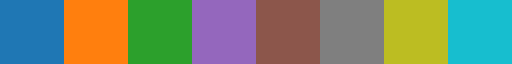

In [46]:
cmap = plt.cm.get_cmap('tab10', len(stats_df_cnr['largeORsmall']))
cmap

In [47]:
cmap = plt.cm.tab10
colors = cmap(np.linspace(0, 1, 4))
colors.shape

(4, 4)

In [48]:
# plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)


In [49]:
# colors

In [50]:
colors = np.repeat(colors, 2, axis=0)
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [51]:
colors = colors[::-1]

In [52]:
# colors.shape

In [53]:
label = ['Very soft', 'Soft', 'Hard', 'Very hard']

In [54]:
label = np.repeat(label, 2, axis=0)
label

array(['Very soft', 'Very soft', 'Soft', 'Soft', 'Hard', 'Hard',
       'Very hard', 'Very hard'], dtype='<U9')

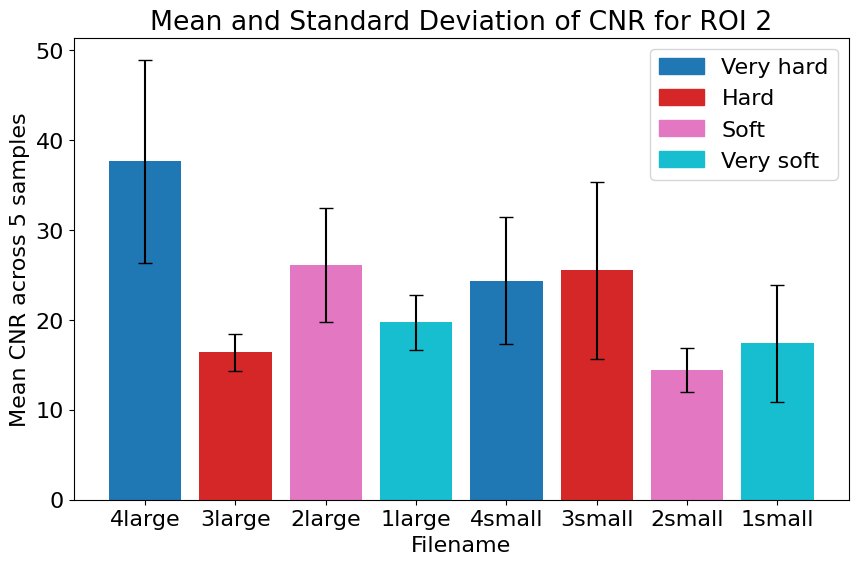

In [55]:
# cmap = plt.cm.get_cmap('viridis', len(stats_df_cnr['largeORsmall']))
# Creating the bar plot with different colors
bar_patches = []

plt.figure(figsize=(10, 6))

stats_df_cnr2 = pd.concat([stats_df_cnr[::2][::-1],stats_df_cnr[1::2][::-1]])

for i, row in stats_df_cnr2.iterrows():
    plt.bar(row['largeORsmall'], row['mean'], yerr=row['std'], color=colors[i], capsize=5)
    if i % 2 == 0:
        bar_patches.append(mpatches.Patch(color=colors[i], label=label[i]))


# Adding labels and title
plt.xlabel('Filename')
plt.ylabel('Mean CNR across 5 samples')
plt.title('Mean and Standard Deviation of CNR for ROI 2')
plt.legend(handles=bar_patches)
plt.show()

In [56]:
stats_df_cnr

,largeORsmall,mean,std
0,1large,19.767429,3.063556
1,1small,17.389834,6.512343
2,2large,26.104834,6.380656
3,2small,14.421498,2.403545
4,3large,16.427070,2.058707
5,3small,25.513110,9.847673
6,4large,37.665001,11.286168
7,4small,24.383787,7.063790


In [57]:
stats_df_cnr[::2][::-1]

,largeORsmall,mean,std
6,4large,37.665001,11.286168
4,3large,16.427070,2.058707
2,2large,26.104834,6.380656
0,1large,19.767429,3.063556


In [58]:
stats_df_cnr[1::2][::-1]

,largeORsmall,mean,std
7,4small,24.383787,7.063790
5,3small,25.513110,9.847673
3,2small,14.421498,2.403545
1,1small,17.389834,6.512343


In [59]:
stats_df_cnr2 = pd.concat([stats_df_cnr[::2][::-1],stats_df_cnr[1::2][::-1]])
stats_df_cnr2

,largeORsmall,mean,std
6,4large,37.665001,11.286168
4,3large,16.427070,2.058707
2,2large,26.104834,6.380656
0,1large,19.767429,3.063556
7,4small,24.383787,7.063790
5,3small,25.513110,9.847673
3,2small,14.421498,2.403545
1,1small,17.389834,6.512343


### Contrast

In [60]:
stats_df_con = df_1roi.groupby('largeORsmall')['contrast2'].agg(['mean', 'std']).reset_index()

In [61]:
stats_df_con

,largeORsmall,mean,std
0,1large,0.307199,0.021523
1,1small,0.263712,0.017040
2,2large,0.338593,0.023266
3,2small,0.277528,0.009185
4,3large,2.229907,0.110314
5,3small,2.778620,0.097180
6,4large,3.869979,0.091012
7,4small,2.816961,0.088800


In [62]:
expected_mean = [0.32,0.32,0.56,0.56,1.8,1.8,3.2,3.2]

In [63]:
expected_std = [0.16,0.16,0.24,0.24,0.61,0.61,1.64,1.64]

/tmp/ipykernel_47442/1396815061.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(stats_df_con['largeORsmall']))


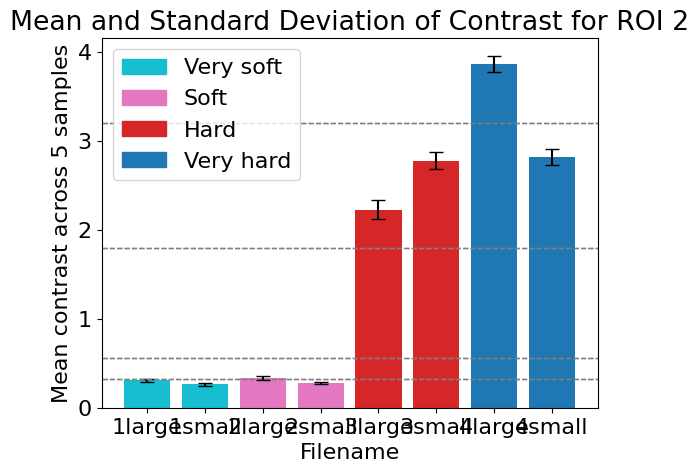

In [64]:
cmap = plt.cm.get_cmap('viridis', len(stats_df_con['largeORsmall']))
# Creating the bar plot with different colors
bar_patches = []

for i, row in stats_df_con.iterrows():
    plt.bar(row['largeORsmall'], row['mean'], yerr=row['std'], color=colors[i], capsize=5)
    plt.axhline(y=expected_mean[i], color='gray', linestyle='--', linewidth=1)
    if i % 2 == 0:
        bar_patches.append(mpatches.Patch(color=colors[i], label=label[i]))
    # plt.bar(row['largeORsmall'] + 0.4, expected_values[i], color='lightgrey', width=0.4, alpha=0.7,
    #     yerr=expected_std[i], capsize=5, label='Expected Data')


# Adding labels and title
plt.xlabel('Filename')
plt.ylabel('Mean contrast across 5 samples')
plt.title('Mean and Standard Deviation of Contrast for ROI 2')
plt.legend(handles=bar_patches)
plt.show()

In [65]:
stats_df_con['expected_mean'] = expected_mean
stats_df_con['expected_std'] = expected_std

In [66]:
stats_df_con

,largeORsmall,mean,std,expected_mean,expected_std
0,1large,0.307199,0.021523,0.32,0.16
1,1small,0.263712,0.017040,0.32,0.16
2,2large,0.338593,0.023266,0.56,0.24
3,2small,0.277528,0.009185,0.56,0.24
4,3large,2.229907,0.110314,1.80,0.61
5,3small,2.778620,0.097180,1.80,0.61
6,4large,3.869979,0.091012,3.20,1.64
7,4small,2.816961,0.088800,3.20,1.64


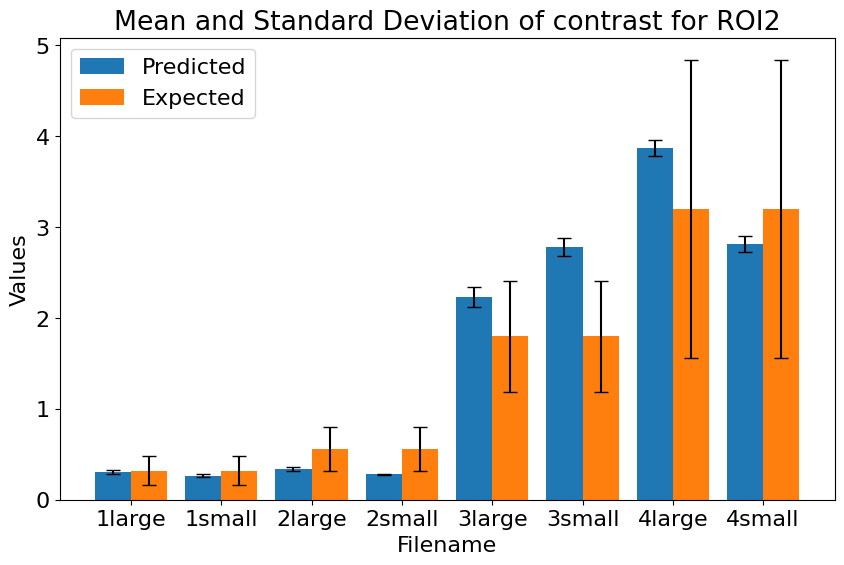

In [67]:
n_filenames = len(stats_df_con['largeORsmall'])

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Set the positions of the bars
ind = np.arange(n_filenames)  # the x locations for the groups
width = 0.4 # the width of the bars

# Plot actual mean and std
ax.bar(ind - width/2, stats_df_con['mean'], width, yerr=stats_df_con['std'], label='Predicted', capsize=5)

# Plot expected mean and std
ax.bar(ind + width/2, stats_df_con['expected_mean'], width, yerr=stats_df_con['expected_std'], label='Expected', capsize=5)

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Filename')
ax.set_ylabel('Values')
ax.set_title('Mean and Standard Deviation of contrast for ROI2')
ax.set_xticks(ind)
ax.set_xticklabels(stats_df_con['largeORsmall'])
ax.legend()

# Show the plot
plt.show()

In [68]:
cmap2 = plt.cm.tab20
colors2 = cmap2(np.linspace(0, 1, 20))
colors2.shape

(20, 4)

In [69]:
colors2

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.68235294, 0.78039216, 0.90980392, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [1.        , 0.73333333, 0.47058824, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.59607843, 0.8745098 , 0.54117647, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [1.        , 0.59607843, 0.58823529, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.77254902, 0.69019608, 0.83529412, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.76862745, 0.61176471, 0.58039216, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.96862745, 0.71372549, 0.82352941, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.78039216, 0.78039216, 0.78039216, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.85882353, 0.85882353,

In [70]:
colors2 = np.delete(colors2, [14,15], axis=0)
# colors2 = np.delete(colors2, 15, axis=0)
colors2

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.68235294, 0.78039216, 0.90980392, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [1.        , 0.73333333, 0.47058824, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.59607843, 0.8745098 , 0.54117647, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [1.        , 0.59607843, 0.58823529, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.77254902, 0.69019608, 0.83529412, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.76862745, 0.61176471, 0.58039216, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.96862745, 0.71372549, 0.82352941, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.85882353, 0.85882353, 0.55294118, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.61960784, 0.85490196,

In [71]:
colors2.shape

(18, 4)

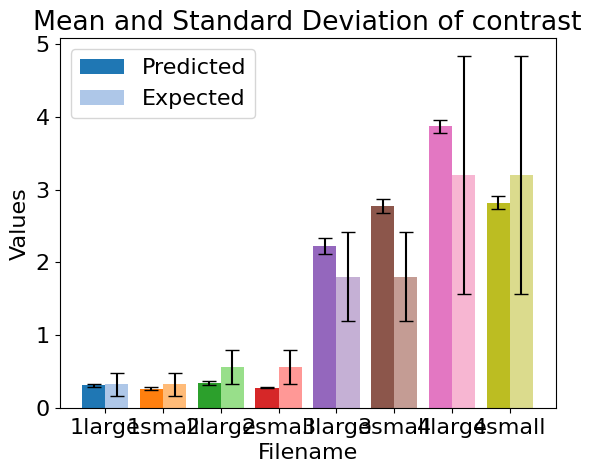

In [72]:
n_filenames = len(stats_df_con['largeORsmall'])

# Create figure and axis
fig, ax = plt.subplots()

# Set the positions of the bars
ind = np.arange(n_filenames)  # the x locations for the groups
width = 0.4 # the width of the bars

# Plot actual mean and std
ax.bar(ind - width/2, stats_df_con['mean'], width, yerr=stats_df_con['std'], color=colors2[::2], label='Predicted', capsize=5)

# Plot expected mean and std
ax.bar(ind + width/2, stats_df_con['expected_mean'], width, yerr=stats_df_con['expected_std'], color=colors2[1::2], label='Expected', capsize=5)

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Filename')
ax.set_ylabel('Values')
ax.set_title('Mean and Standard Deviation of contrast')
ax.set_xticks(ind)
ax.set_xticklabels(stats_df_con['largeORsmall'])
ax.legend()

# Show the plot
plt.show()

/tmp/ipykernel_47442/1964704542.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 8)


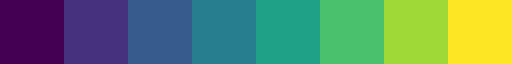

In [73]:
cmap = plt.cm.get_cmap('viridis', 8)
cmap

/tmp/ipykernel_47442/3581707109.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 16)


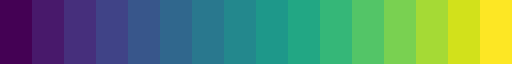

In [74]:
cmap = plt.cm.get_cmap('viridis', 16)
cmap

/tmp/ipykernel_47442/2626484629.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 20)


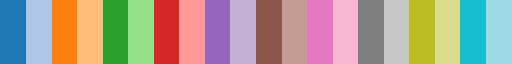

In [75]:
cmap = plt.cm.get_cmap('tab20', 20)
cmap

/tmp/ipykernel_47442/3469699981.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(stats_df_con['largeORsmall']))


NameError: name 'expected_values' is not defined

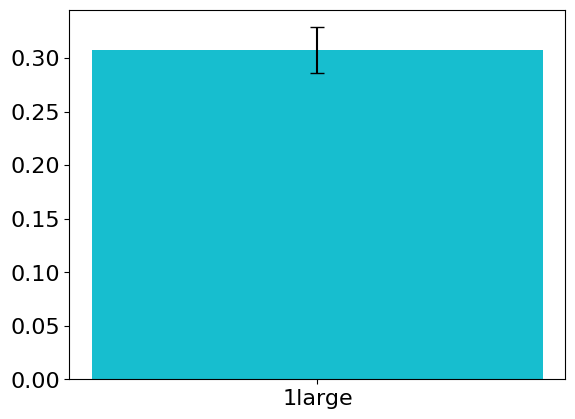

In [76]:
cmap = plt.cm.get_cmap('viridis', len(stats_df_con['largeORsmall']))
# Creating the bar plot with different colors
bar_patches = []

for i, row in stats_df_con.iterrows():
    plt.bar(row['largeORsmall'], row['mean'], yerr=row['std'], color=colors[i], capsize=5)
    plt.axhline(y=expected_values[i], color='gray', linestyle='--', linewidth=1)
    if i % 2 == 0:
        bar_patches.append(mpatches.Patch(color=colors[i], label=label[i]))
    # plt.bar(row['largeORsmall'] + 0.4, expected_values[i], color='lightgrey', width=0.4, alpha=0.7,
    #     yerr=expected_std[i], capsize=5, label='Expected Data')


# Adding labels and title
plt.xlabel('Filename')
plt.ylabel('Mean contrast across 5 samples')
plt.title('Mean and Standard Deviation of Contrast for ROI 2')
plt.legend(handles=bar_patches)
plt.show()

/tmp/ipykernel_47442/3469699981.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(stats_df_con['largeORsmall']))


NameError: name 'expected_values' is not defined

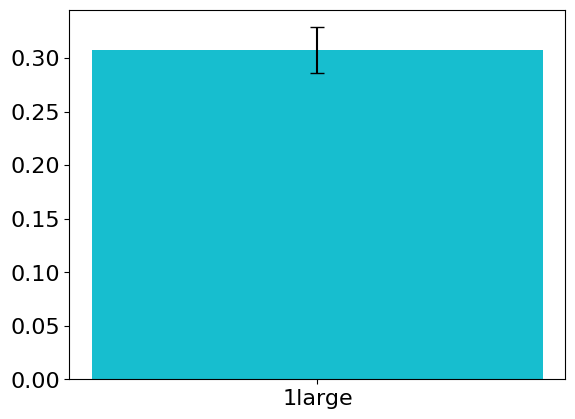

In [77]:
cmap = plt.cm.get_cmap('viridis', len(stats_df_con['largeORsmall']))
# Creating the bar plot with different colors
bar_patches = []

for i, row in stats_df_con.iterrows():
    plt.bar(row['largeORsmall'], row['mean'], yerr=row['std'], color=colors[i], capsize=5)
    plt.axhline(y=expected_values[i], color='gray', linestyle='--', linewidth=1)
    if i % 2 == 0:
        bar_patches.append(mpatches.Patch(color=colors[i], label=label[i]))
    # plt.bar(row['largeORsmall'] + 0.4, expected_values[i], color='lightgrey', width=0.4, alpha=0.7,
    #     yerr=expected_std[i], capsize=5, label='Expected Data')


# Adding labels and title
plt.xlabel('Filename')
plt.ylabel('Mean contrast across 5 samples')
plt.title('Mean and Standard Deviation of Contrast for ROI 2')
plt.legend(handles=bar_patches)
plt.show()

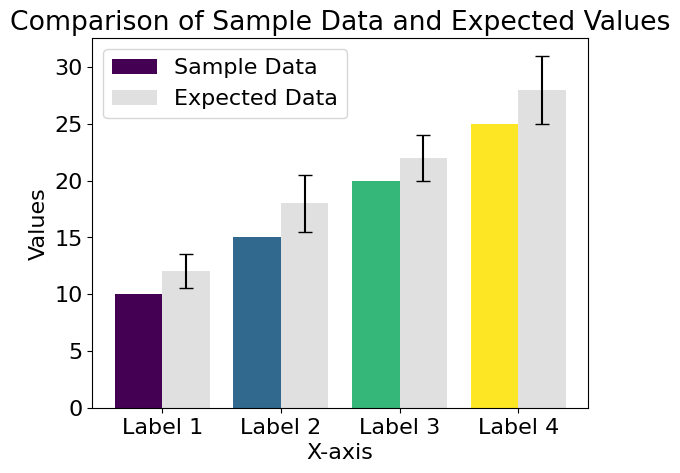

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Generate 'viridis' colormap for sample data
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, 4))  # Generate 4 colors from 'viridis'

# Example data for plotting
x = np.array([1, 2, 3, 4])  # Positions for the bars
y = [10, 15, 20, 25]  # Sample mean data
sample_std = [2, 3, 1, 4]  # Sample standard deviation data
expected_values = [12, 18, 22, 28]  # Expected mean values
expected_std = [1.5, 2.5, 2, 3]  # Expected standard deviation values

# Create a figure
plt.figure()

# Plot bars for sample data
for i in range(4):
    plt.bar(x[i], y[i], color=colors[i], width=0.4, label='Sample Data' if i == 0 else "")

# Plot bars for expected data, slightly offset to the right
for i in range(4):
    plt.bar(x[i] + 0.4, expected_values[i], color='lightgrey', width=0.4, alpha=0.7,
            yerr=expected_std[i], capsize=5, label='Expected Data' if i == 0 else "")

# Customizing the plot
plt.xlabel('X-axis')
plt.ylabel('Values')
plt.title('Comparison of Sample Data and Expected Values')
plt.xticks(x + 0.2, ['Label 1', 'Label 2', 'Label 3', 'Label 4'])  # Adjust x-ticks to be in the middle of the groups

# Adding the legend
plt.legend()

# Show the plot
plt.show()


In [79]:
df.head()

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.2,3.775764,18.632513
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.2,3.907964,81.077449
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.2,3.961420,69.181006
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.2,3.931541,66.310231
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.2,3.906253,44.319464


In [80]:
df['ROI_rank'] = df.groupby('file_name')['cnr2'].rank(ascending=False)

In [81]:
df_rank = df.dropna(subset=["type"])

In [82]:
df_rank.head()

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.2,3.775764,18.632513,4.0
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.2,3.907964,81.077449,1.0
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.2,3.961420,69.181006,2.0
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.2,3.931541,66.310231,3.0
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.2,3.906253,44.319464,4.0


<Figure size 1000x600 with 0 Axes>

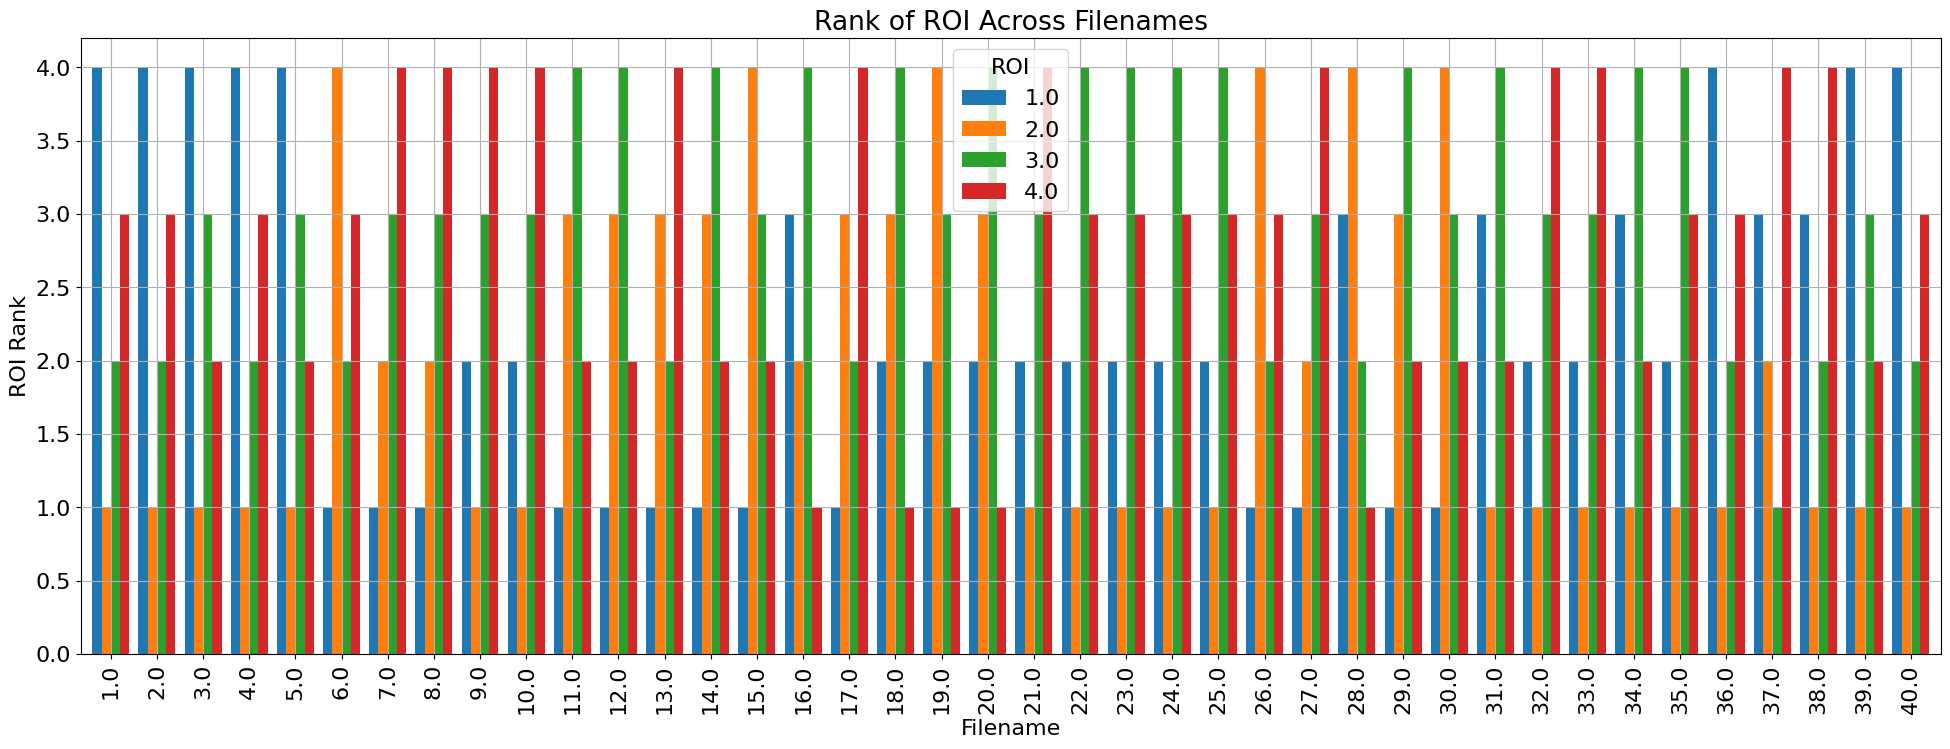

In [83]:
pivot_df = df_rank.pivot(index='file_name', columns='ROI', values='ROI_rank')

# Plotting
plt.figure(figsize=(10, 6))
# for roi in pivot_df.columns:
#     plt.plot(pivot_df.index, pivot_df[roi], marker='o', label=roi)

ax = pivot_df.plot(kind='bar', figsize=(24, 8), width=0.8)

plt.xlabel('Filename')
plt.ylabel('ROI Rank')
plt.title('Rank of ROI Across Filenames')
plt.legend(title='ROI')
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

In [84]:
cmap3 = plt.cm.tab20
colors3 = cmap3(np.linspace(0, 1, 8))
colors3.shape

(8, 4)

In [85]:
colors3 = np.repeat(colors3, 5, axis=0)
colors3.shape

(40, 4)

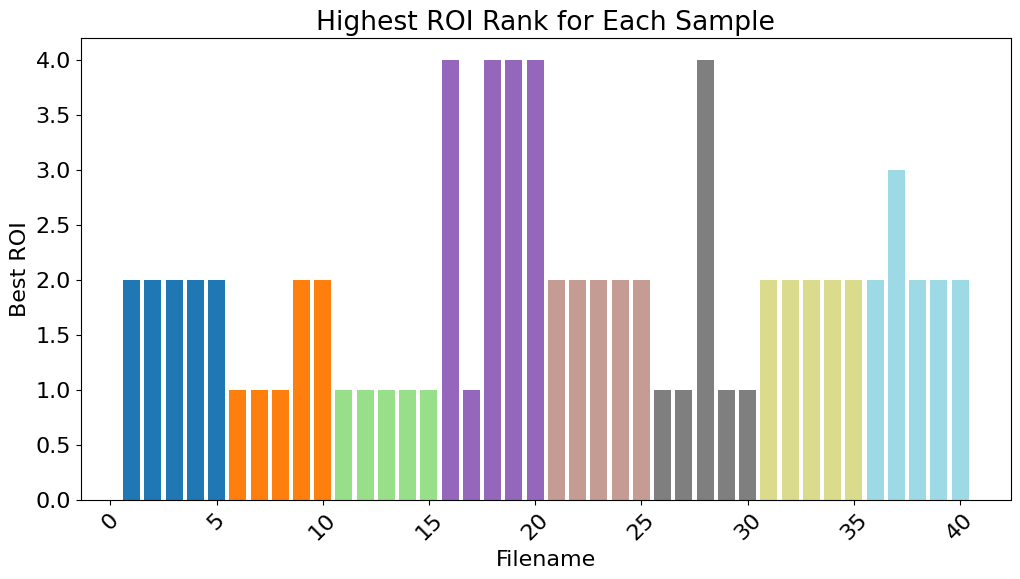

In [86]:
highest_rank_df = df_rank.loc[df_rank.groupby('file_name')['ROI_rank'].idxmin()]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(highest_rank_df['file_name'], highest_rank_df['ROI'], color=colors3)

plt.xlabel('Filename')
plt.ylabel('Best ROI')
plt.title('Highest ROI Rank for Each Sample')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [87]:
# highest_rank_df

In [88]:
highest_rank_df.head()

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.2,3.907964,81.077449,1.0
5,2.0,2.0,3.876447,129.503222,"('4large', 'hard')",2.19 to 4.84,3.2,3.876447,129.503222,1.0
9,3.0,2.0,3.880726,81.530521,"('4large', 'hard')",2.19 to 4.84,3.2,3.880726,81.530521,1.0
13,4.0,2.0,3.794400,101.167309,"('4large', 'hard')",2.19 to 4.84,3.2,3.794400,101.167309,1.0
17,5.0,2.0,3.855734,108.688508,"('4large', 'hard')",2.19 to 4.84,3.2,3.855734,108.688508,1.0


In [89]:
df_rank['ROI']

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
155    4.0
156    1.0
157    2.0
158    3.0
159    4.0
Name: ROI, Length: 160, dtype: float64

In [90]:
df_rank.groupby('file_name')['ROI']

In [91]:
df

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.2,3.775764,18.632513,4.0
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.2,3.907964,81.077449,1.0
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.2,3.961420,69.181006,2.0
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.2,3.931541,66.310231,3.0
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.2,3.906253,44.319464,4.0
...,...,...,...,...,...,...,...,...,...,...
175,44.0,4.0,1.300139,6.396515,NaN,NaN,NaN,NaN,6.396515,4.0
176,45.0,1.0,2.873032,19.671067,NaN,NaN,NaN,NaN,19.671067,1.0
177,45.0,2.0,1.491235,16.731120,NaN,NaN,NaN,NaN,16.731120,2.0
178,45.0,3.0,1.431818,8.482150,NaN,NaN,NaN,NaN,8.482150,4.0


In [92]:
df_rank

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.20,3.775764,18.632513,4.0
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.20,3.907964,81.077449,1.0
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.20,3.961420,69.181006,2.0
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.20,3.931541,66.310231,3.0
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.20,3.906253,44.319464,4.0
...,...,...,...,...,...,...,...,...,...,...
155,39.0,4.0,1.431883,13.424638,"('1small', 'soft')",0.16 to 0.58,0.32,0.698381,13.424638,2.0
156,40.0,1.0,3.582558,11.352206,"('1small', 'soft')",0.16 to 0.58,0.32,0.279130,11.352206,4.0
157,40.0,2.0,2.420032,63.743249,"('1small', 'soft')",0.16 to 0.58,0.32,0.413218,63.743249,1.0
158,40.0,3.0,2.123361,20.106732,"('1small', 'soft')",0.16 to 0.58,0.32,0.470951,20.106732,2.0


Text(0, 0.5, 'Avg rank')

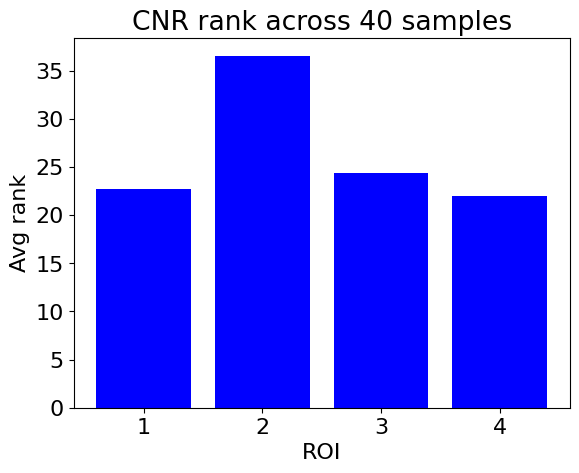

In [93]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['cnr2'].mean() for i in range(1,5)]
plt.bar(categories, values, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Avg rank')

Text(0, 0.5, 'Avg rank')

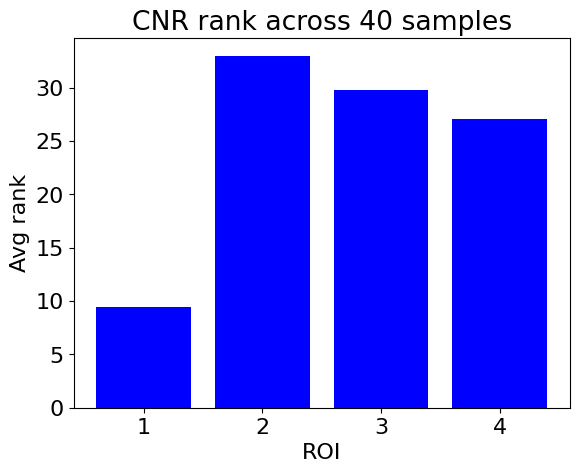

In [94]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['cnr2'].std() for i in range(1,5)]
plt.bar(categories, values, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Avg rank')

Text(0, 0.5, 'Avg rank')

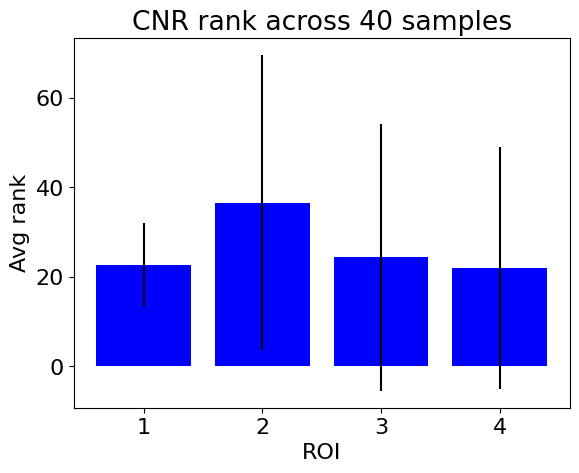

In [95]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['cnr2'].mean() for i in range(1,5)]
values_std = [df_rank[df_rank['ROI'] == i]['cnr2'].std() for i in range(1,5)]
plt.bar(categories, values, yerr=values_std, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Avg rank')

Text(0, 0.5, 'Avg rank')

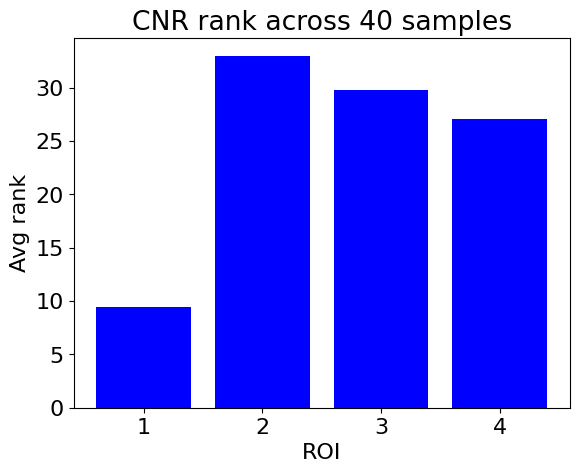

In [96]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['cnr2'].mean() for i in range(1,5)]
values_std = [df_rank[df_rank['ROI'] == i]['cnr2'].std() for i in range(1,5)]
plt.bar(categories, values_std, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Avg rank')

In [97]:
[df_rank[df_rank['ROI'] == i]['cnr2'].mean() for i in range(1,5)]

[22.70907041517955, 36.56735358838487, 24.336841261852683, 21.953228989803115]

In [98]:
[df_rank[df_rank['ROI'] == i]['cnr2'].std() for i in range(1,5)]

[9.421699163329693, 33.00068298000644, 29.80852961370618, 27.046036781215502]

In [99]:
df_rank

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.20,3.775764,18.632513,4.0
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.20,3.907964,81.077449,1.0
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.20,3.961420,69.181006,2.0
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.20,3.931541,66.310231,3.0
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.20,3.906253,44.319464,4.0
...,...,...,...,...,...,...,...,...,...,...
155,39.0,4.0,1.431883,13.424638,"('1small', 'soft')",0.16 to 0.58,0.32,0.698381,13.424638,2.0
156,40.0,1.0,3.582558,11.352206,"('1small', 'soft')",0.16 to 0.58,0.32,0.279130,11.352206,4.0
157,40.0,2.0,2.420032,63.743249,"('1small', 'soft')",0.16 to 0.58,0.32,0.413218,63.743249,1.0
158,40.0,3.0,2.123361,20.106732,"('1small', 'soft')",0.16 to 0.58,0.32,0.470951,20.106732,2.0


In [100]:
df_rank['ROI_rank_reci'] = 5.0 - df_rank['ROI_rank']

/tmp/ipykernel_47442/1989357987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank['ROI_rank_reci'] = 5.0 - df_rank['ROI_rank']


In [101]:
df_rank

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank,ROI_rank_reci
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.20,3.775764,18.632513,4.0,1.0
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.20,3.907964,81.077449,1.0,4.0
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.20,3.961420,69.181006,2.0,3.0
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.20,3.931541,66.310231,3.0,2.0
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.20,3.906253,44.319464,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
155,39.0,4.0,1.431883,13.424638,"('1small', 'soft')",0.16 to 0.58,0.32,0.698381,13.424638,2.0,3.0
156,40.0,1.0,3.582558,11.352206,"('1small', 'soft')",0.16 to 0.58,0.32,0.279130,11.352206,4.0,1.0
157,40.0,2.0,2.420032,63.743249,"('1small', 'soft')",0.16 to 0.58,0.32,0.413218,63.743249,1.0,4.0
158,40.0,3.0,2.123361,20.106732,"('1small', 'soft')",0.16 to 0.58,0.32,0.470951,20.106732,2.0,3.0


Text(0, 0.5, 'Avg rank')

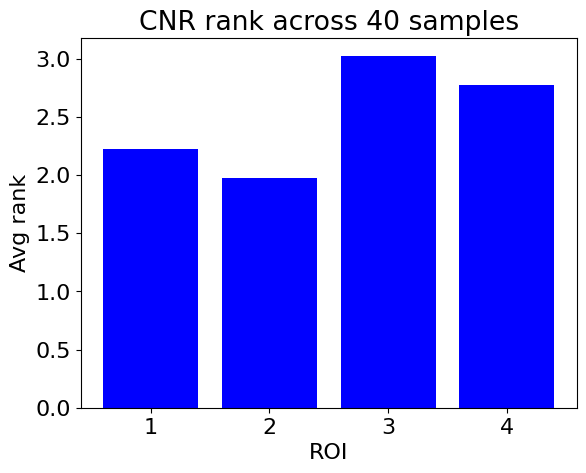

In [102]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['ROI_rank'].mean() for i in range(1,5)]
plt.bar(categories, values, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Avg rank')
# plt.gca().invert_yaxis()

([<matplotlib.axis.XTick at 0x7ff0c22fd2e0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

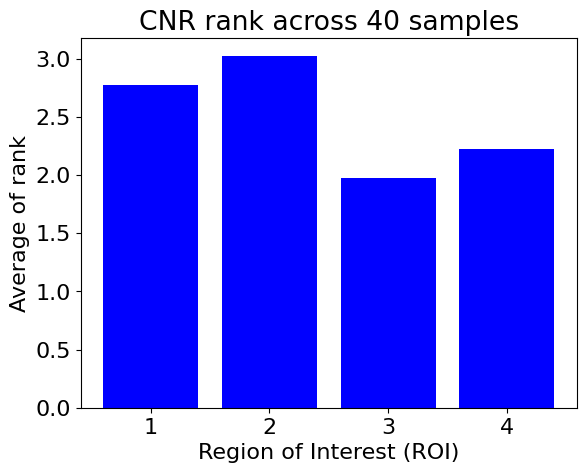

In [143]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['ROI_rank_reci'].mean() for i in range(1,5)]
plt.bar(categories, values, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Average of rank')
plt.xticks([1,2,3,4])
# plt.gca().invert_yaxis()

([<matplotlib.axis.XTick at 0x7ff0c91a7610>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

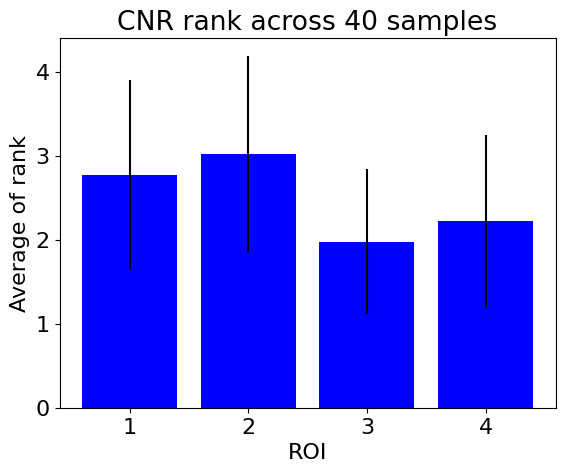

In [104]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['ROI_rank_reci'].mean() for i in range(1,5)]
values_std = [df_rank[df_rank['ROI'] == i]['ROI_rank_reci'].std() for i in range(1,5)]
plt.bar(categories, values, yerr=values_std, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Average of rank')
plt.xticks([1,2,3,4])

# plt.gca().invert_yaxis()

In [105]:
values = [df_rank[df_rank['ROI'] == i]['ROI_rank'].mean() for i in range(1,5)]
values

[2.225, 1.975, 3.025, 2.775]

Text(0, 0.5, 'Avg rank')

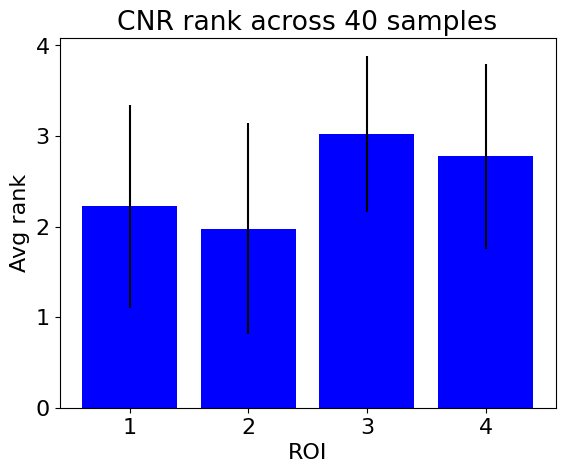

In [106]:
categories = [1,2,3,4]
values = [df_rank[df_rank['ROI'] == i]['ROI_rank'].mean() for i in range(1,5)]
values_std = [df_rank[df_rank['ROI'] == i]['ROI_rank'].std() for i in range(1,5)]
plt.bar(categories, values, yerr=values_std, color='blue')
plt.title('CNR rank across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Avg rank')

In [107]:
df_rank[df_rank['ROI'] == i]['ROI_rank'].mean() for i in range(1,5)

SyntaxError: invalid syntax (794471493.py, line 1)

In [108]:
df_rank[df_rank['ROI'] == 1.0]['ROI_rank'].value_counts()

ROI_rank
1.0    13
2.0    13
4.0     8
3.0     6
Name: count, dtype: int64

In [109]:
df_rank[df_rank['ROI'] == 2.0]['ROI_rank'].value_counts()

ROI_rank
1.0    21
3.0     8
4.0     6
2.0     5
Name: count, dtype: int64

In [110]:
df_rank[df_rank['ROI'] == 3.0]['ROI_rank'].value_counts()

ROI_rank
3.0    14
4.0    14
2.0    11
1.0     1
Name: count, dtype: int64

In [111]:
df_rank[df_rank['ROI'] == 4.0]['ROI_rank'].value_counts()

ROI_rank
3.0    12
4.0    12
2.0    11
1.0     5
Name: count, dtype: int64

In [112]:
df_rank[df_rank['ROI'] == 3.0]['ROI_rank'].value_counts()

ROI_rank
3.0    14
4.0    14
2.0    11
1.0     1
Name: count, dtype: int64

In [113]:
df_rank

,file_name,ROI,contrast,cnr,type,contrast_range,expected_avg,contrast2,cnr2,ROI_rank,ROI_rank_reci
0,1.0,1.0,3.775764,18.632513,"('4large', 'hard')",2.19 to 4.84,3.20,3.775764,18.632513,4.0,1.0
1,1.0,2.0,3.907964,81.077449,"('4large', 'hard')",2.19 to 4.84,3.20,3.907964,81.077449,1.0,4.0
2,1.0,3.0,3.961420,69.181006,"('4large', 'hard')",2.19 to 4.84,3.20,3.961420,69.181006,2.0,3.0
3,1.0,4.0,3.931541,66.310231,"('4large', 'hard')",2.19 to 4.84,3.20,3.931541,66.310231,3.0,2.0
4,2.0,1.0,3.906253,44.319464,"('4large', 'hard')",2.19 to 4.84,3.20,3.906253,44.319464,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
155,39.0,4.0,1.431883,13.424638,"('1small', 'soft')",0.16 to 0.58,0.32,0.698381,13.424638,2.0,3.0
156,40.0,1.0,3.582558,11.352206,"('1small', 'soft')",0.16 to 0.58,0.32,0.279130,11.352206,4.0,1.0
157,40.0,2.0,2.420032,63.743249,"('1small', 'soft')",0.16 to 0.58,0.32,0.413218,63.743249,1.0,4.0
158,40.0,3.0,2.123361,20.106732,"('1small', 'soft')",0.16 to 0.58,0.32,0.470951,20.106732,2.0,3.0


In [114]:
df_rank[df_rank['ROI'] == 4.0]['ROI_rank'].value_counts()

ROI_rank
3.0    12
4.0    12
2.0    11
1.0     5
Name: count, dtype: int64

In [115]:
df_rank[df_rank['ROI'] == 2.0]['ROI_rank'].value_counts().sum()

40

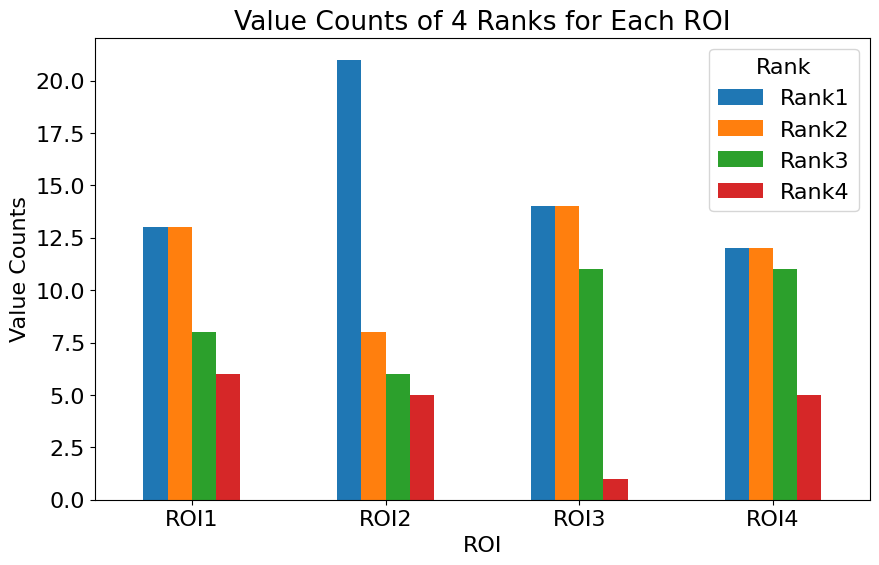

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame setup
df_rank_count = pd.DataFrame({
    'ROI': ['ROI1', 'ROI2', 'ROI3', 'ROI4'],
    'Rank1': [13, 21, 14, 12],
    'Rank2': [13, 8, 14, 12],
    'Rank3': [8, 6, 11,11],
    'Rank4': [6, 5, 1, 5]
})
# Set 'ROI' as the index if it's not already
df_rank_count.set_index('ROI', inplace=True)

# Plotting
ax = df_rank_count.plot(kind='bar', figsize=(10, 6))

plt.xlabel('ROI')
plt.ylabel('Value Counts')
plt.title('Value Counts of 4 Ranks for Each ROI')
plt.xticks(rotation=0)  # Set the x-axis labels to be horizontal
plt.legend(title='Rank')
plt.show()

In [120]:
plt.rcParams.update({'font.size': 16})

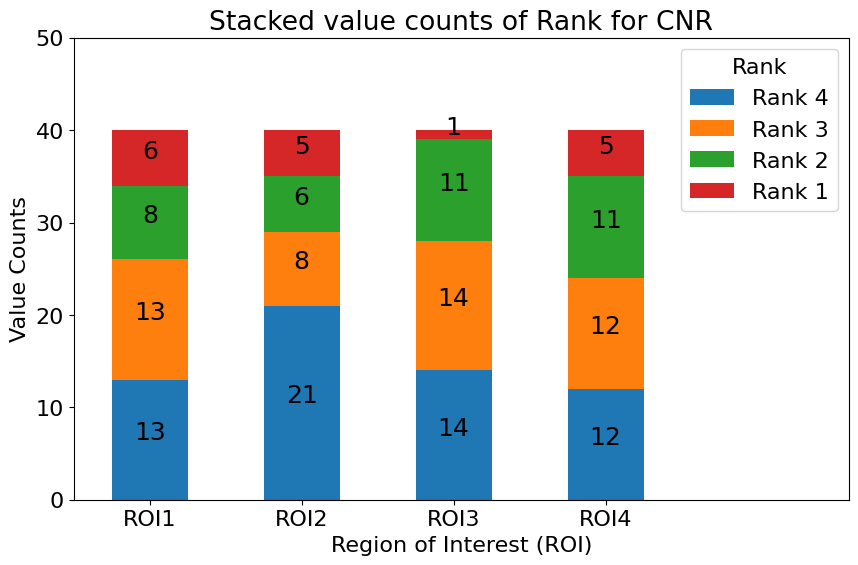

In [141]:

# Example DataFrame setup
df_rank_count = pd.DataFrame({
    'ROI': ['ROI1', 'ROI2', 'ROI3', 'ROI4'],
    'Rank1': [13, 21, 14, 12],
    'Rank2': [13, 8, 14, 12],
    'Rank3': [8, 6, 11,11],
    'Rank4': [6, 5, 1, 5]
})
# Set 'ROI' as the index
df_rank_count.set_index('ROI', inplace=True)

# Plotting stacked bars
ax = df_rank_count.plot(kind='bar', stacked=True, figsize=(10, 6))

# Annotating with text
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                (bar.get_x() + bar.get_width() / 2, 
                 bar.get_y() + bar.get_height() / 2),
                ha='center', va='center',
                size=18, xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Value Counts')
plt.title('Stacked value counts of Rank for CNR')
plt.xticks(rotation=0)  # Set the x-axis labels to be horizontal
plt.legend(title='Rank',  labels=['Rank 4','Rank 3','Rank 2','Rank 1' ])
plt.xlim([-0.5, 4.6])
plt.ylim([0, 50])
plt.show()


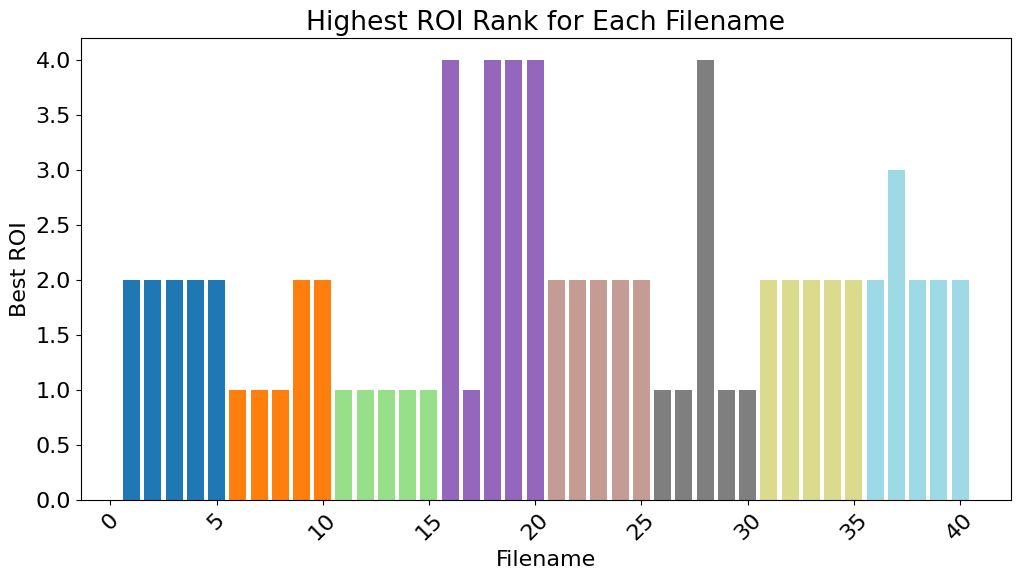

In [118]:
highest_rank_df = df_rank.loc[df_rank.groupby('file_name')['ROI_rank'].idxmin()]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(highest_rank_df['file_name'], highest_rank_df['ROI'], color=colors3)

plt.xlabel('Filename')
plt.ylabel('Best ROI')
plt.title('Highest ROI Rank for Each Filename')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

Text(0, 0.5, 'Avg cnr')

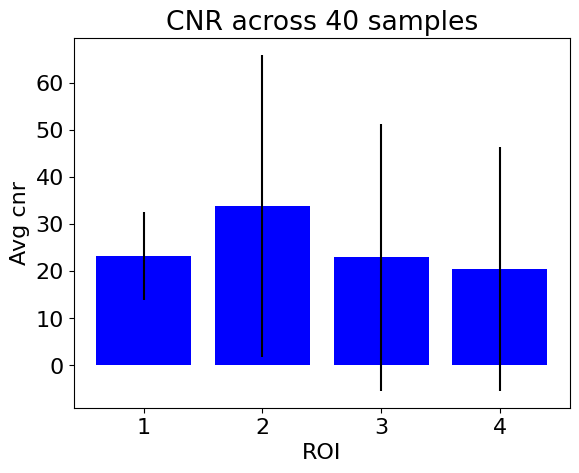

In [119]:
# Creating the bar plot
categories = [1,2,3,4]
values = [df[df['ROI'] == i]['cnr2'].mean() for i in range(1,5)]
values_std = [df[df['ROI'] == i]['cnr2'].std() for i in range(1,5)]
plt.bar(categories, values,  yerr=values_std, color='blue')
plt.title('CNR across 40 samples')
plt.xlabel('ROI')
plt.ylabel('Avg cnr')